# The XXZ model

In this file we will give step by step instructions on how to analyze the spin 1/2 XXZ model.
The necessary packages to follow this tutorial are:

In [1]:
using MPSKit, MPSKitModels, TensorKit, Plots
import TensorOperations; TensorOperations.disable_cache(); # hide

## Failure

First we should define the hamiltonian we want to work with.
Then we specify an initial guess, which we then further optimize.
Working directly in the thermodynamic limit, this is achieved as follows:

In [2]:
H = xxz(; spin=1//2);

MPOHamiltonian{ComplexSpace, TensorMap{ComplexSpace, 2, 2, Trivial, Matrix{ComplexF64}, Nothing, Nothing}, ComplexF64}(MPSKit.SparseMPOSlice{ComplexSpace, TensorMap{ComplexSpace, 2, 2, Trivial, Matrix{ComplexF64}, Nothing, Nothing}, ComplexF64}[[TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 1.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  1.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  -0.35355339059327373 + 0.0im

[:, :, 2, 1] =
 -0.3535533905932736 + 0.0im  0.0 + 0.0im
 … TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 -0.3535533905932736 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.35355339059327373 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
; TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0

We then need an intial state, which we shall later optimize. In this example we work directly in the thermodynamic limit.

In [3]:
random_data = TensorMap(rand, ComplexF64, ℂ^20 * ℂ^2, ℂ^20);
state = InfiniteMPS([random_data]);

The groundstate can then be found by calling find_groundstate.

In [4]:
groundstate, cache, delta = find_groundstate(state, H, VUMPS());

┌ Info: vumps @iteration 1 galerkin = 0.000403410751763573
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 2 galerkin = 0.4867628378424288
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 3 galerkin = 0.4524034104592681
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 4 galerkin = 0.55899527446702
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 5 galerkin = 0.4391454707063199
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 6 galerkin = 0.6319729916597104
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 7 galerkin = 0.6070942805006277
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 8 galerkin = 0.44715437645109724
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 9 galerkin = 0.5214582478176155
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 10 galerkin = 0.5535071639905241
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 11 galerkin = 0.4832253514468412
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 12 galerkin = 0.5416444941519847
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 13 galerkin = 0.5269167897006053
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 14 galerkin = 0.4072988998919731
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 15 galerkin = 0.3601456589550345
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 16 galerkin = 0.40586508279959915
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 17 galerkin = 0.46837876391640065
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 18 galerkin = 0.5304345128851423
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 19 galerkin = 0.41508252476971486
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 20 galerkin = 0.5280235089935906
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 21 galerkin = 0.42159484883774145
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 22 galerkin = 0.16003114561045742
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 23 galerkin = 0.5646103271088472
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 24 galerkin = 0.43016756633667036
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 25 galerkin = 0.45459741158128875
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 26 galerkin = 0.4434313177875925
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 27 galerkin = 0.38195622159408454
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 28 galerkin = 0.5501176427089295
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 29 galerkin = 0.5306089903211404
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 30 galerkin = 0.4557885404050256
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 31 galerkin = 0.4236114705148403
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 32 galerkin = 0.5543215704906475
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 33 galerkin = 0.4256362976893456
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 34 galerkin = 0.4427995095016326
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 35 galerkin = 0.4651167839470721
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 36 galerkin = 0.5547126394280996
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 37 galerkin = 0.5576002537946472
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 38 galerkin = 0.49232373080750197
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 39 galerkin = 0.5207280102745975
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 40 galerkin = 0.4831009171289717
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 41 galerkin = 0.5523409510217063
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 42 galerkin = 0.5132758652861135
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 43 galerkin = 0.5296774001014206
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 44 galerkin = 0.47090190250339425
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 45 galerkin = 0.4024244130894618
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 46 galerkin = 0.25331475020993527
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 47 galerkin = 0.31877656674997074
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 48 galerkin = 0.1924981941103853
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 49 galerkin = 0.360734985014865
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 50 galerkin = 0.47047213539996374
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 51 galerkin = 0.5229660750023242
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 52 galerkin = 0.39532126092862585
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 53 galerkin = 0.4922739869751538
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 54 galerkin = 0.38038680435726896
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 55 galerkin = 0.5747797556900442
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 56 galerkin = 0.5232740810853885
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 57 galerkin = 0.4386159088110431
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 58 galerkin = 0.35275248668116327
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 59 galerkin = 0.20209333332377755
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 60 galerkin = 0.6243930938057107
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 61 galerkin = 0.45966907887429553
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 62 galerkin = 0.2872177293144054
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 63 galerkin = 0.41828528403981646
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 64 galerkin = 0.5028843687192447
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 65 galerkin = 0.4221418469891051
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 66 galerkin = 0.4271505750037201
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 67 galerkin = 0.3943127375160601
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 68 galerkin = 0.4203740385008635
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 69 galerkin = 0.2788624776096725
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 70 galerkin = 0.4829846422855433
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 71 galerkin = 0.43825689589765104
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 72 galerkin = 0.5563700749333177
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 73 galerkin = 0.4728985332161687
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 74 galerkin = 0.16278865476209478
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 75 galerkin = 0.09474260672726294
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 76 galerkin = 0.3872183313216451
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 77 galerkin = 0.5153901418782665
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 78 galerkin = 0.5503851182255151
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 79 galerkin = 0.39384662805733783
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 80 galerkin = 0.4332383449882835
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 81 galerkin = 0.505279664202934
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 82 galerkin = 0.5033308689270237
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 83 galerkin = 0.5989277342027247
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 84 galerkin = 0.5245924859905118
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 85 galerkin = 0.42191815814860717
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 86 galerkin = 0.5057235095176168
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 87 galerkin = 0.5071937071459842
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 88 galerkin = 0.5483996477987084
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 89 galerkin = 0.4260243768985279
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 90 galerkin = 0.509396703229305
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 91 galerkin = 0.4633604489560294
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 92 galerkin = 0.5653828315648053
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 93 galerkin = 0.5217589428789332
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 94 galerkin = 0.4935425958207558
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 95 galerkin = 0.5142410164873804
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 96 galerkin = 0.4531681443832023
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 97 galerkin = 0.5136281259249158
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 98 galerkin = 0.3873700335575661
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 99 galerkin = 0.32912147453404966
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 100 galerkin = 0.2671822157199025
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Warning: vumps didn't converge 0.2671822157199025
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:69


As you can see, VUMPS struggles to converge.
On it's own, that is already quite curious.
Maybe we can do better using another algorithm, such as gradient descent.

In [5]:
groundstate, cache, delta = find_groundstate(state, H, GradientGrassmann(maxiter=20));

┌ Info: CG: initializing with f = 0.249999932861, ‖∇f‖ = 5.7051e-04
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:39


┌ Info: CG: iter    1: f = 0.003282245821, ‖∇f‖ = 5.9440e-01, α = 1.71e+03, β = 0.00e+00, nfg = 5
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter    2: f = -0.031361329535, ‖∇f‖ = 5.4839e-01, α = 4.34e+04, β = 1.76e+03, nfg = 10
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter    3: f = -0.061394048534, ‖∇f‖ = 5.9803e-01, α = 1.60e+00, β = 2.96e-01, nfg = 25
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter    4: f = -0.093399521472, ‖∇f‖ = 6.2018e-01, α = 1.60e+00, β = 4.27e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter    5: f = -0.216667629411, ‖∇f‖ = 6.0359e-01, α = 1.02e+00, β = 3.65e-01, nfg = 3
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter    6: f = -0.340855801602, ‖∇f‖ = 4.3957e-01, α = 7.36e-01, β = 2.93e-01, nfg = 3
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter    7: f = -0.379793590790, ‖∇f‖ = 3.7800e-01, α = 6.08e-01, β = 4.30e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter    8: f = -0.413937349400, ‖∇f‖ = 2.0057e-01, α = 4.30e-01, β = 2.00e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter    9: f = -0.423086710259, ‖∇f‖ = 1.5362e-01, α = 3.04e-01, β = 3.37e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   10: f = -0.428855621460, ‖∇f‖ = 1.2543e-01, α = 3.11e-01, β = 3.94e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   11: f = -0.432143720301, ‖∇f‖ = 1.2041e-01, α = 2.17e-01, β = 5.02e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   12: f = -0.435159050114, ‖∇f‖ = 1.3144e-01, α = 1.98e-01, β = 6.09e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   13: f = -0.438348700685, ‖∇f‖ = 1.0134e-01, α = 2.38e-01, β = 4.25e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   14: f = -0.439972474747, ‖∇f‖ = 5.4357e-02, α = 3.28e-01, β = 1.17e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   15: f = -0.440490471493, ‖∇f‖ = 4.4983e-02, α = 2.19e-01, β = 2.42e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   16: f = -0.440756433362, ‖∇f‖ = 4.2534e-02, α = 8.35e-02, β = 1.14e+00, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   17: f = -0.441041391328, ‖∇f‖ = 4.3233e-02, α = 1.94e-01, β = 3.71e-01, nfg = 3
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   18: f = -0.441542873349, ‖∇f‖ = 3.4137e-02, α = 4.23e-01, β = 2.42e-01, nfg = 3
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Info: CG: iter   19: f = -0.441684193345, ‖∇f‖ = 3.1435e-02, α = 1.33e-01, β = 4.95e-01, nfg = 2
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:83


┌ Warning: CG: not converged to requested tol: f = -0.441848638194, ‖∇f‖ = 2.7977e-02
└ @ OptimKit /home/lkdvos/.julia/packages/OptimKit/xpmbV/src/cg.jl:103


Convergence is quite slow and even fails after sufficiently many iterations.
To understand why, we can look at the transfer matrix spectrum.

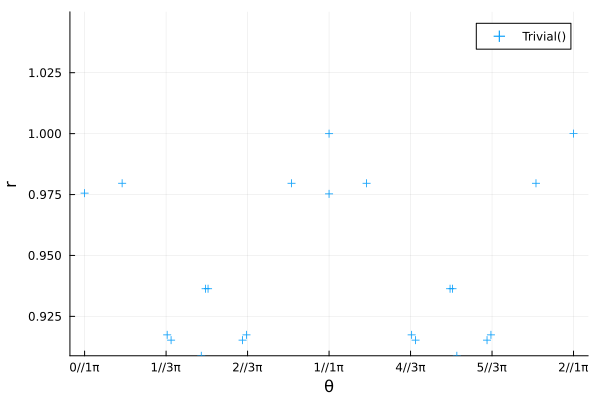

In [6]:
transferplot(groundstate, groundstate)

We can clearly see multiple eigenvalues close to the unit circle.
Our state is close to being non-injective, and represents the sum of multiple injective states.
This is numerically very problematic, but also indicates that we used an incorrect ansatz to approximate the groundstate.
We should retry with a larger unit cell.

## Success

Let's initialize a different initial state, this time with a 2-site unit cell:

In [7]:
A = TensorMap(rand, ComplexF64, ℂ^20 * ℂ^2, ℂ^20);
B = TensorMap(rand, ComplexF64, ℂ^20 * ℂ^2, ℂ^20);
state = InfiniteMPS([A, B]);

In MPSKit, we require that the periodicity of the hamiltonian equals that of the state it is applied to.
This is not a big obstacle, you can simply repeat the original hamiltonian.
Alternatively, the hamiltonian can be constructed directly on a two-site unitcell by making use of MPSKitModels.jl's `@mpoham`.

In [8]:
# H2 = repeat(H, 2); -- copies the one-site version
H2 = xxx(ComplexF64, ℤ{1}, InfiniteChain(2); spin=1//2)

MPOHamiltonian{ComplexSpace, TensorMap{ComplexSpace, 2, 2, Trivial, Matrix{ComplexF64}, Nothing, Nothing}, ComplexF64}(MPSKit.SparseMPOSlice{ComplexSpace, TensorMap{ComplexSpace, 2, 2, Trivial, Matrix{ComplexF64}, Nothing, Nothing}, ComplexF64}[[TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 1.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  1.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^3)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.5 + 0.0im  0.0 + 0.0im

[:, :, 1, 2] =
 0.0 + 0.0im  0.5 + 0.0im

[:, :, 2, 2] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 1, 3] =
 -0.3535533905932736 + 0.0im  0.0 + 0.0im

[:, :, 2, 3] =
 0.0 + 0.0im  0.35355339059327373 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
; TensorMap((ℂ^3 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im
 0.0 + 0.0im  0.0 + 0.0im
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
 0.0 + 0.0im  

In [9]:
groundstate, cache, delta = find_groundstate(state, H2, VUMPS(maxiter=100, tol_galerkin=1e-12));

┌ Info: vumps @iteration 1 galerkin = 0.02543220019294478
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 2 galerkin = 0.5249442298813334
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 3 galerkin = 0.04958266738227484
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 4 galerkin = 0.010724704534439685
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 5 galerkin = 0.0061625660954955285
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 6 galerkin = 0.0045550519448618685
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 7 galerkin = 0.002928947594456801
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 8 galerkin = 0.002020002445225532
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 9 galerkin = 0.0013286844194799754
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 10 galerkin = 0.0009524223642284259
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 11 galerkin = 0.0006621620182967126
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 12 galerkin = 0.0004894166953940982
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 13 galerkin = 0.0003471616505208656
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 14 galerkin = 0.00026093210394197413
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 15 galerkin = 0.0001922566662148301
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 16 galerkin = 0.00014801052443432766
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 17 galerkin = 0.00011799712383608287
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 18 galerkin = 9.33814688113562e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 19 galerkin = 8.30235965798156e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 20 galerkin = 6.822682563647491e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 21 galerkin = 6.546406085594308e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 22 galerkin = 5.705076320175656e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 23 galerkin = 5.5054632399738816e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 24 galerkin = 4.9482549049995984e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 25 galerkin = 4.770628037865315e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 26 galerkin = 4.354373436001694e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 27 galerkin = 4.19156015150698e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 28 galerkin = 3.857336089865533e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 29 galerkin = 3.7104298415516015e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 30 galerkin = 3.431596847103874e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 31 galerkin = 3.301295940321001e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 32 galerkin = 3.064114459043863e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 33 galerkin = 2.9498613295324283e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 34 galerkin = 2.7461864669632512e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 35 galerkin = 2.6466697354578844e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 36 galerkin = 2.4710442429834914e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 37 galerkin = 2.3846697731182484e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 38 galerkin = 2.2330835551288994e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 39 galerkin = 2.1582442168170867e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 40 galerkin = 2.0275636429046028e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 41 galerkin = 1.9627638714908444e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 42 galerkin = 1.8504482971162776e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 43 galerkin = 1.7943495095839635e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 44 galerkin = 1.6982985777797357e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 45 galerkin = 1.649727022365584e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 46 galerkin = 1.5681903593958457e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 47 galerkin = 1.5261291850697172e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 48 galerkin = 1.4576469266596233e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 49 galerkin = 1.4212230564373968e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 50 galerkin = 1.3645823204779766e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 51 galerkin = 1.333052818560079e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 52 galerkin = 1.2872532417372544e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 53 galerkin = 1.2599927411011311e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 54 galerkin = 1.224217179851306e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 55 galerkin = 1.200706254950751e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 56 galerkin = 1.1742906369097184e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 57 galerkin = 1.1541042747058285e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 58 galerkin = 1.1365228125625888e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 59 galerkin = 1.1193368315906971e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 60 galerkin = 1.1101484585475204e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 61 galerkin = 1.0957184832281284e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 62 galerkin = 1.094593796032173e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 63 galerkin = 1.0827746521754048e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 64 galerkin = 1.0894651432156537e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 65 galerkin = 1.080195114685624e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 66 galerkin = 1.0945397557333387e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 67 galerkin = 1.0878390560233222e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 68 galerkin = 1.1097626622615708e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 69 galerkin = 1.1057392244661787e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 70 galerkin = 1.1352588079615782e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 71 galerkin = 1.1341153178123044e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 72 galerkin = 1.1713526018076478e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 73 galerkin = 1.1733975553524016e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 74 galerkin = 1.2185973894507819e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 75 galerkin = 1.224261825498835e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 76 galerkin = 1.2778168261403736e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 77 galerkin = 1.2876788307418845e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 78 galerkin = 1.3501614864103536e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 79 galerkin = 1.3649813429153161e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 80 galerkin = 1.4371859420768506e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 81 galerkin = 1.4579560689824656e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 82 galerkin = 1.540954465611602e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 83 galerkin = 1.56897023662347e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 84 galerkin = 1.6641877776456977e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 85 galerkin = 1.7011484980397462e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 86 galerkin = 1.81047001328713e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 87 galerkin = 1.8586245227229376e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 88 galerkin = 1.984545914603015e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 89 galerkin = 2.0469058408483606e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 90 galerkin = 2.192756231841514e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 91 galerkin = 2.2734142531609724e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 92 galerkin = 2.4436901070060933e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 93 galerkin = 2.5483059031054116e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 94 galerkin = 2.7491876749732383e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 95 galerkin = 2.8857493850486355e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 96 galerkin = 3.125925440756088e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 97 galerkin = 3.307140668261403e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 98 galerkin = 3.598004685972465e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66


┌ Info: vumps @iteration 99 galerkin = 3.839703168679361e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Info: vumps @iteration 100 galerkin = 4.201330743201275e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:66
┌ Warning: vumps didn't converge 4.201330743201275e-5
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/vumps.jl:69


We get convergence, but it takes an enormous amount of iterations.
The reason behind this becomes more obvious at higher bond dimensions:

In [10]:
groundstate, cache, delta = find_groundstate(state, H2, IDMRG2(trscheme=truncdim(50), maxiter=20, tol_galerkin=1e-12))
entanglementplot(groundstate)

┌ Info: idmrg iter 1 err 0.03622931795054525
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 2 err 0.019393397302014153
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 3 err 0.013304124898729397
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 4 err 0.010100162046560638
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 5 err 0.008120935852796187
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 6 err 0.006777802868640598
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 7 err 0.005807601507214752
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 8 err 0.00507444077753642
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 9 err 0.004501648318869716
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 10 err 0.004041684563059507
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 11 err 0.003664776378453068
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 12 err 0.003350115603997533
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 13 err 0.003083612587427198
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 14 err 0.0028550424125006442
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 15 err 0.00265687124748256
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 16 err 0.0024834277134078947
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 17 err 0.002330362968347683
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 18 err 0.0021942885547615444
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 19 err 0.002072529995046312
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 20 err 0.001962957324495161
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 21 err 0.001863831856630127
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 22 err 0.0017737057191326278
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 23 err 0.0016913900780571739
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 24 err 0.0016158146984846583
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 25 err 0.0015464178459070914
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 26 err 0.0014822374644494459
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 27 err 0.0014227686397544573
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


┌ Info: idmrg iter 28 err 0.0013675033928124173
└ @ MPSKit /home/lkdvos/Projects/JuliaProjects/MPSKit.jl/src/algorithms/groundstate/idmrg.jl:188


We see that some eigenvalues clearly belong to a group, and are almost degenerate.
This implies 2 things:
- there is superfluous information, if those eigenvalues are the same anyway
- poor convergence if we cut off within such a subspace

It are precisely those problems that we can solve by using symmetries.

## Symmetries

The XXZ Heisenberg hamiltonian is SU(2) symmetric and we can exploit this to greatly speed up the simulation.

It is cumbersome to construct symmetric hamiltonians, but luckily su(2) symmetric XXZ is already implemented:

In [ ]:
H2 = xxx(ComplexF64, SU₂, InfiniteChain(2); spin=1//2);

Our initial state should also be SU(2) symmetric.
It now becomes apparent why we have to use a two-site periodic state.
The physical space carries a half-integer charge and the first tensor maps the first `virtual_space ⊗ the physical_space` to the second `virtual_space`.
Half-integer virtual charges will therefore map only to integer charges, and vice versa.
The staggering thus happens on the virtual level.

An alternative constructor for the initial state is

In [ ]:
P = Rep[SU₂](1 // 2 => 1)
V1 = Rep[SU₂](1 // 2 => 10, 3 // 2 => 5, 5 // 2 => 2)
V2 = Rep[SU₂](0 => 15, 1 => 10, 2 => 5)
state = InfiniteMPS([P, P], [V1, V2]);

Even though the bond dimension is higher than in the example without symmetry, convergence is reached much faster:

In [ ]:
println(dim(V1))
println(dim(V2))
groundstate, cache, delta = find_groundstate(state, ham, VUMPS(maxiter=400, tol_galerkin=1e-12));